# Trabalho de AEDV (A1)
    Igor Cortes Junqueira
    Igor Patricio Michels

Preparação do ambiente:

In [271]:
library(readr)
library(stringr)
library(dplyr)
library(ggplot2)
shows <- read_csv("tv_shows.csv")
disney <- read_csv("disney_plus_shows.csv")
netflix <- read_csv("netflix_titles.csv")
prime <- read_csv("Prime TV Shows Data set.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  ID = col_character(),
  Title = col_character(),
  Year = col_double(),
  Age = col_character(),
  IMDb = col_double(),
  Rotten_Tomatoes = col_character(),
  Netflix = col_double(),
  Hulu = col_double(),
  Prime_Video = col_double(),
  DisneyPlus = col_double(),
  type = col_double()
)


Warning message:
“85 parsing failures.
row col   expected    actual           file
 63  -- 11 columns 1 columns 'tv_shows.csv'
 69  -- 11 columns 1 columns 'tv_shows.csv'
423  -- 11 columns 1 columns 'tv_shows.csv'
453  -- 11 columns 1 columns 'tv_shows.csv'
528  -- 11 columns 1 columns 'tv_shows.csv'
... ... .......... ......... ..............
See problems(...) for more details.
”

── Column specification ────────────────────────────────────────────────────────
cols(
  imdb_id = col_character(),
  title = col_character(),
  plot = col_character(),
  type = col_character(),
  rated = col_character(),
  year = co

Compondo a base do trabalho:

In [272]:
# Limpando o databse conjunto para os dados relevantes


cshows <- shows %>% mutate(Streamings = paste(sep = " ", ifelse(Netflix == 1, "Netflix", ""),
                                                         ifelse(Prime_Video == 1, "Prime", ""),
                                                         ifelse(DisneyPlus == 1, "Disney", "")) %>%
                                        trimws() %>%
                                        str_replace(" ",", ")) %>%
                                        select(-Netflix, -Hulu, -Prime_Video, -DisneyPlus, -type, -ID)

cshows <- subset(cshows, Streamings != "NA, NA NA" & Streamings != "")
cshows <- cshows %>% mutate(Rotten_Tomatoes = as.numeric(sub("%", "", Rotten_Tomatoes)))


# Importanto Genero dos demais databases

t1 <- netflix %>% mutate(Title = title, Genre = listed_in) %>% select(Title, Genre) 
t2 <- prime %>% mutate(Title = ) %>% select(Title, Genre)
t3 <- disney %>% mutate(Title = title, Genre = genre) %>% select(Title, Genre)
gb <- c("Title", "Genre")
t <- full_join(t1, full_join(t2, t3, by = gb), by = gb)

cshows <- left_join(cshows, t, by = 'Title')
glimpse(cshows)

Rows: 4,143
Columns: 7
$ Title           <chr> "Breaking Bad", "Stranger Things", "Money Heist", "Sh…
$ Year            <dbl> 2008, 2016, 2017, 2010, 2015, 2005, 2011, 2005, 2005,…
$ Age             <chr> "18+", "16+", "18+", "16+", "18+", "16+", "18+", "16+…
$ IMDb            <dbl> 9.5, 8.8, 8.4, 9.1, 8.7, 8.9, 8.8, 8.4, 8.4, 8.8, 9.2…
$ Rotten_Tomatoes <dbl> 96, 93, 91, 78, 97, 81, 83, 93, 93, 92, 100, 81, 94, …
$ Streamings      <chr> "Netflix", "Netflix", "Netflix", "Netflix", "Netflix"…
$ Genre           <chr> "Crime TV Shows, TV Dramas, TV Thrillers", "TV Horror…


Buscando a lista de gêneros

In [273]:
x <- ""
for(g in cshows[,'Genre'][[1]]){
    c <- str_replace_all(g,"TV","") %>%
         str_replace_all("Reality-", "Reality-Show") %>%
         str_replace_all("Sci-Fi", "Sci-fi") %>%
         str_replace_all("Sci-fi comedy", "") %>%
         str_replace_all(" &", ",") %>%
         str_replace_all("Movies", "") %>%
         str_replace_all("Shows", "") %>%
         str_replace_all("/", "") %>%
         str_replace_all("Mysteries", "Mystery") %>%
         str_replace_all("Comedies", "Comedy") %>%
         str_replace_all("Documentaries", "Documentary") %>%
         str_replace_all("Dramas", "Drama") %>%
         str_replace_all("Musicals", "Musical") %>%
         str_replace_all("Thrillers", "Thriller") %>%
         str_replace_all("Talk-Show", "") %>%
         str_replace_all("Romantic", "Romance") %>%
         str_replace_all("Anime Series", "Anime") %>%
         str_replace_all("Kids\'", "") %>%
         str_replace_all("Kids\'", "")

    x <- paste(x, trimws(c), sep = ",")
}

gens <- strsplit(x, ",")[[1]] %>%
        trimws() %>%
        unique()

gens <- gens[gens != ""]
gens

[1] "Crime"            "Drama"            "Thriller"         "Horror"          
 [5] "Mystery"          "Sci-fi"           "Fantasy"          "NA"              
 [9] "British"          "International"    "Comedy"           "Classic"         
[13] "Cult"             "Action"           "Adventure"        "Suspense"        
[17] "Anime"            "Romance"          "Spanish-Language" "Teen"            
[21] "Docuseries"       "Science"          "Nature"           "Reality"         
[25] "Documentary"      "Sports"           "Korean"           "Animation"       
[29] "Family"           "Musical"          "Independent"      "Stand-Up Comedy" 
[33] "Talk"             "Reality-Show"     "Game-Show"        "Kids"            
[37] "Children"         "Short"            "Music"            "Western"         
[41] "LGBTQ"            "Arts"             "Entertainment"    "Culture"

### Análise Exploratória:

In [274]:
head(cshows,5)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Breaking Bad,2008,18+,9.5,96,Netflix,"Crime TV Shows, TV Dramas, TV Thrillers"
Stranger Things,2016,16+,8.8,93,Netflix,"TV Horror, TV Mysteries, TV Sci-Fi & Fantasy"
Money Heist,2017,18+,8.4,91,Netflix,NA
Sherlock,2010,16+,9.1,78,Netflix,"British TV Shows, Crime TV Shows, International TV Shows"
Better Call Saul,2015,18+,8.7,97,Netflix,"Crime TV Shows, TV Comedies, TV Dramas"


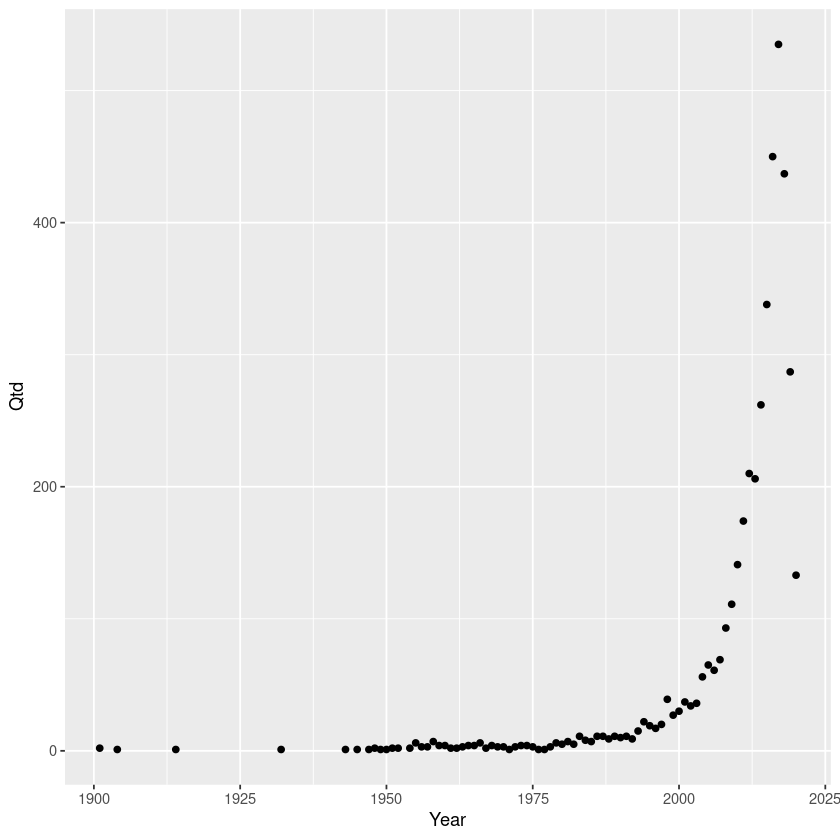

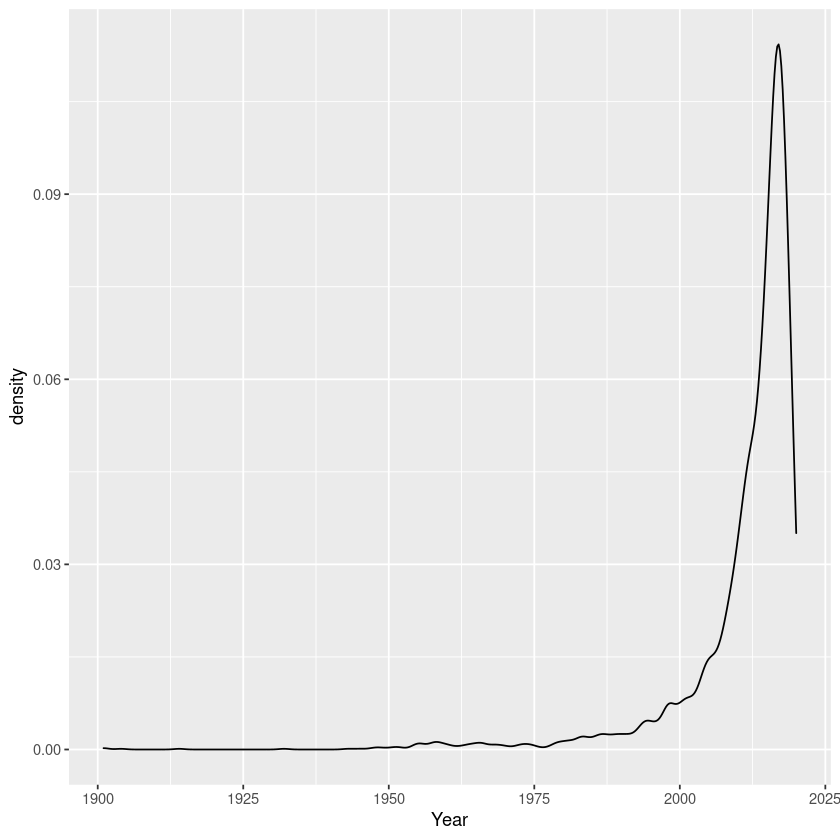

In [275]:
# Evolução da quantidade de séries ao longo do tempo
cshows %>% group_by(Year) %>% tally(name='Qtd') %>% arrange(Year) %>% ggplot(aes(Year, Qtd)) + geom_point()
cshows %>% ggplot(aes(Year)) + geom_density()

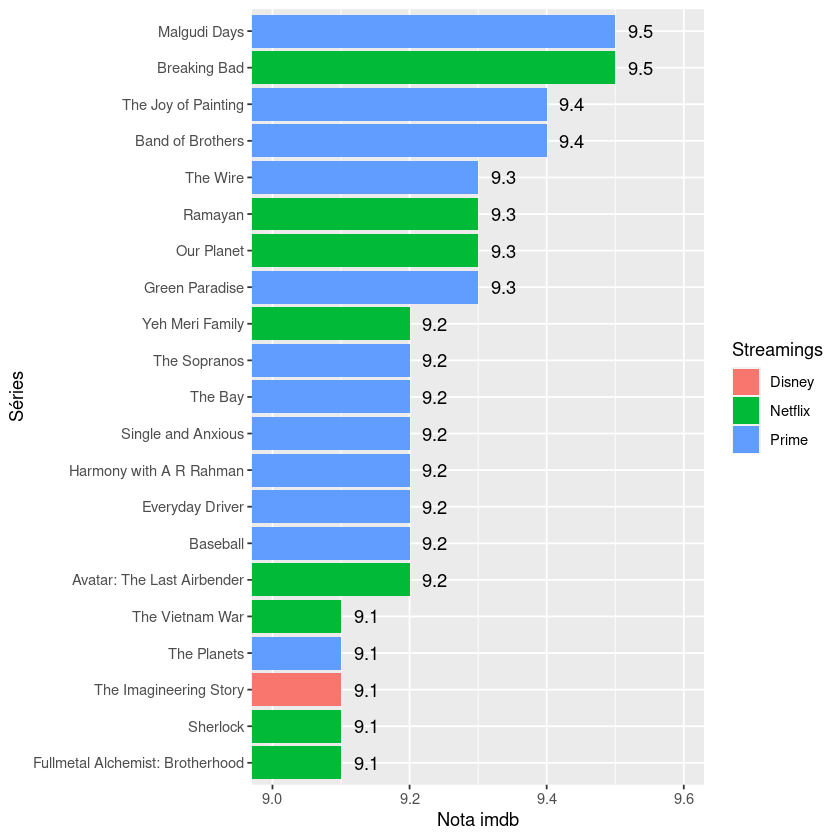

In [276]:
# Melhores séries pelo IMDb, notas > 9
(cshows %>% arrange(-IMDb) %>% filter(IMDb>9)) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(9,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

In [277]:
# Séries 100% no Rotten Tomatoes
cshows %>% filter(Rotten_Tomatoes==100) %>% select(Title) %>% arrange(Title) %>% as.list() %>% print()

$Title
 [1] "1983"                                        
 [2] "3Below: Tales of Arcadia"                    
 [3] "Abstract: The Art of Design"                 
 [4] "Avatar: The Last Airbender"                  
 [5] "Better Than Us"                              
 [6] "Big Mouth"                                   
 [7] "Black Books"                                 
 [8] "Carole & Tuesday"                            
 [9] "Chef's Table"                                
[10] "Chewing Gum"                                 
[11] "Counterpart"                                 
[12] "Crazyhead"                                   
[13] "Diagnosis"                                   
[14] "Diary of a Future President"                 
[15] "Dirty Money"                                 
[16] "DuckTales"                                   
[17] "DuckTales"                                   
[18] "Elfen Lied"                                  
[19] "Fauda"                                       
[20] 

In [278]:
# Séries 100% no Rotten Tomatoes de Sci-fi
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Sci")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
3Below: Tales of Arcadia,2018,7+,7.8,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
Diagnosis,2019,18+,7.8,100,Netflix,"Docuseries, Science & Nature TV"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Gravity Falls,2012,7+,8.9,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Mystery Science Theater 3000: The Return,2017,16+,8.0,100,Netflix,"TV Comedies, TV Sci-Fi & Fantasy"
Star Wars Rebels,2014,7+,8.0,100,Disney,"Animation, Action, Adventure, Family, Fantasy, Mystery, Sci-Fi"
The Dragon Prince,2018,7+,8.4,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
The New Legends of Monkey,2018,7+,6.5,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"


In [279]:
# Séries 100% no Rotten Tomatoes de Aventura
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Adventure")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
3Below: Tales of Arcadia,2018,7+,7.8,100,Netflix,"Kids' TV, TV Action & Adventure, TV Sci-Fi & Fantasy"
Avatar: The Last Airbender,2005,7+,9.2,100,Netflix,"Classic & Cult TV, Kids' TV, TV Action & Adventure"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Adventure, Comedy, Family"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Fauda,2015,16+,8.3,100,Netflix,"Crime TV Shows, International TV Shows, TV Action & Adventure"
Gravity Falls,2012,7+,8.9,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Green Eggs and Ham,2019,NA,8.2,100,Netflix,"Kids' TV, TV Action & Adventure, TV Comedies"
Lizzie McGuire,2001,all,6.6,100,Disney,"Adventure, Comedy, Family, Music, Romance"
Queen Sono,2020,18+,5.8,100,Netflix,"International TV Shows, TV Action & Adventure, TV Dramas"


In [280]:
# Séries 100% no Rotten Tomatoes de Ciência
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Scien")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Diagnosis,2019,18+,7.8,100,Netflix,"Docuseries, Science & Nature TV"


In [281]:
# Séries musicais 100% no Rotten Tomatoes
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Genre,"Music")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Lizzie McGuire,2001,all,6.6,100,Disney,"Adventure, Comedy, Family, Music, Romance"


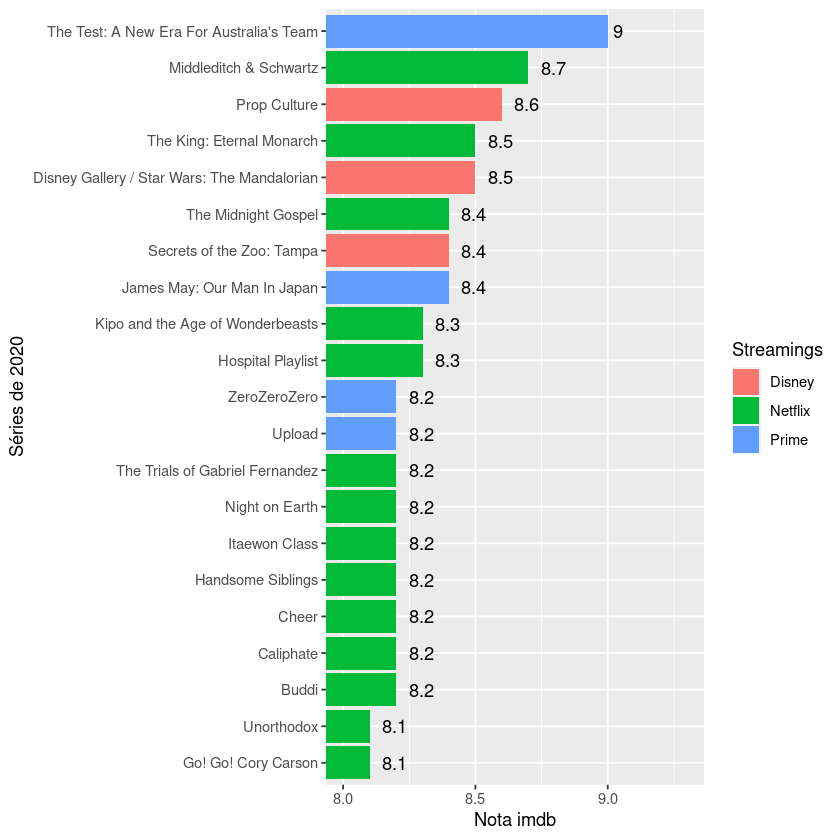

In [282]:
# Melhores séries de 2020 pelo IMDb (nota > 8)
cshows %>% filter(Year==2020, IMDb>8) %>% arrange(-IMDb) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(8,9.3)) + xlab("Séries de 2020") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

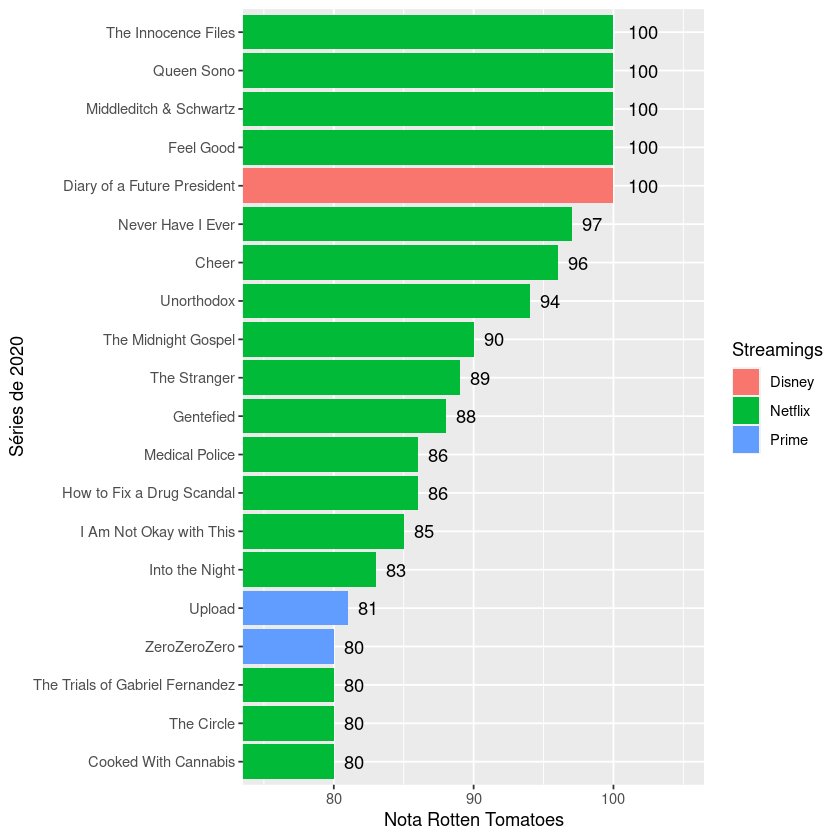

In [283]:
# Melhores séries de 2020 pelo Rotten Tomatoes (nota > 80)
cshows %>% filter(Year==2020, Rotten_Tomatoes>=80) %>%
    ggplot(aes(reorder(Title,Rotten_Tomatoes),Rotten_Tomatoes)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(75,105)) + xlab("Séries de 2020") + ylab("Nota Rotten Tomatoes") +
    geom_text(aes(label = Rotten_Tomatoes), hjust = -.5)

In [284]:
# Séries 100% no Rotten Tomatoes disponpiveis na Netflix
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Streamings,"Netflix")) %>%
    select(Title) %>% arrange(Title) %>% as.list() %>% print()

$Title
 [1] "1983"                                        
 [2] "3Below: Tales of Arcadia"                    
 [3] "Abstract: The Art of Design"                 
 [4] "Avatar: The Last Airbender"                  
 [5] "Better Than Us"                              
 [6] "Big Mouth"                                   
 [7] "Carole & Tuesday"                            
 [8] "Chef's Table"                                
 [9] "Chewing Gum"                                 
[10] "Crazyhead"                                   
[11] "Diagnosis"                                   
[12] "Dirty Money"                                 
[13] "Fauda"                                       
[14] "Feel Good"                                   
[15] "Final Fantasy XIV: Dad of Light"             
[16] "Flowers"                                     
[17] "Fullmetal Alchemist: Brotherhood"            
[18] "Giri/Haji"                                   
[19] "Green Eggs and Ham"                          
[20] 

In [285]:
# Séries 100% no Rotten Tomatoes disponpiveis na Prime Vídeo
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Streamings,"Prime")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Black Books,2000,7+,8.5,100,Prime,NA
Counterpart,2017,18+,8.1,100,Prime,NA
Elfen Lied,2004,18+,8.0,100,Prime,NA
Fleabag,2016,18+,8.7,100,Prime,Comedy
Funny or Die Presents,2010,18+,5.6,100,Prime,NA
Garfunkel and Oates,2014,18+,7.5,100,Prime,NA
Home Fires,2015,7+,8.2,100,Prime,NA
Mr. Bean,1990,all,8.5,100,Prime,Comedy
Mr. Show with Bob and David,1995,18+,8.3,100,Prime,NA


In [286]:
# Séries 100% no Rotten Tomatoes disponpiveis no Disney+
cshows %>% filter(Rotten_Tomatoes==100, str_detect(Streamings,"Disney")) %>% arrange(Title)

Title,Year,Age,IMDb,Rotten_Tomatoes,Streamings,Genre
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>
Diary of a Future President,2020,7+,5.5,100,Disney,"Comedy, Family"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Adventure, Comedy, Family"
DuckTales,2017,7+,8.2,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Gravity Falls,2012,7+,8.9,100,Disney,"Animation, Action, Adventure, Comedy, Family, Fantasy, Mystery, Sci-Fi"
Lizzie McGuire,2001,all,6.6,100,Disney,"Comedy, Drama, Family"
Lizzie McGuire,2001,all,6.6,100,Disney,"Adventure, Comedy, Family, Music, Romance"
Star Wars Rebels,2014,7+,8.0,100,Disney,"Animation, Action, Adventure, Family, Fantasy, Mystery, Sci-Fi"
The Imagineering Story,2019,7+,9.1,100,Disney,Documentary


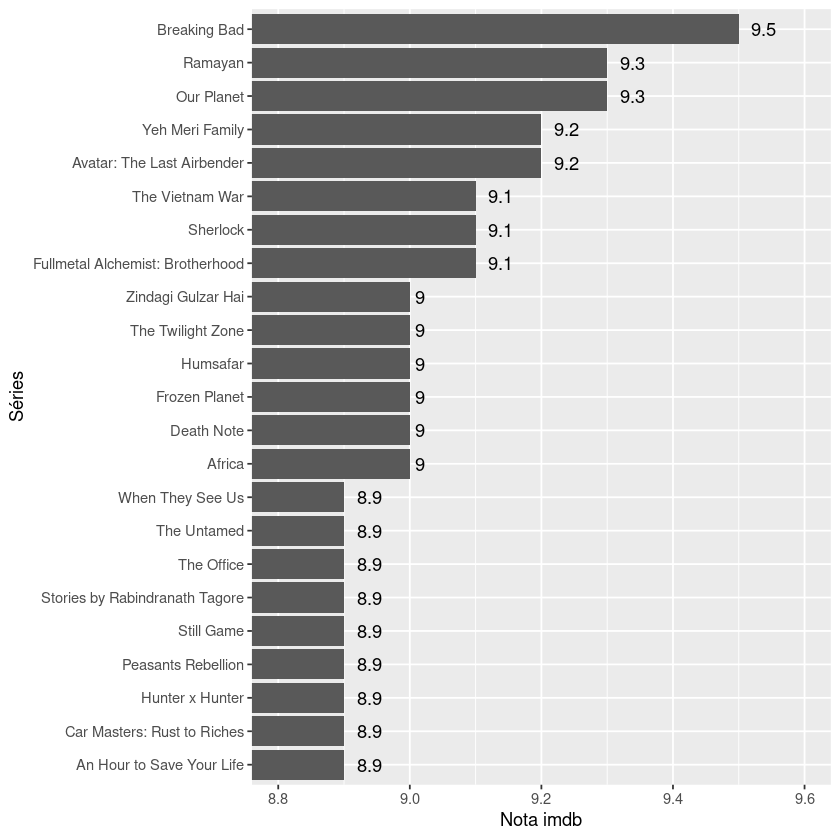

In [287]:
# Melhores séries disponíveis na Netflix pelo IMDb, notas > 8.8
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.8, str_detect(Streamings, "Netflix"))) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.8,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

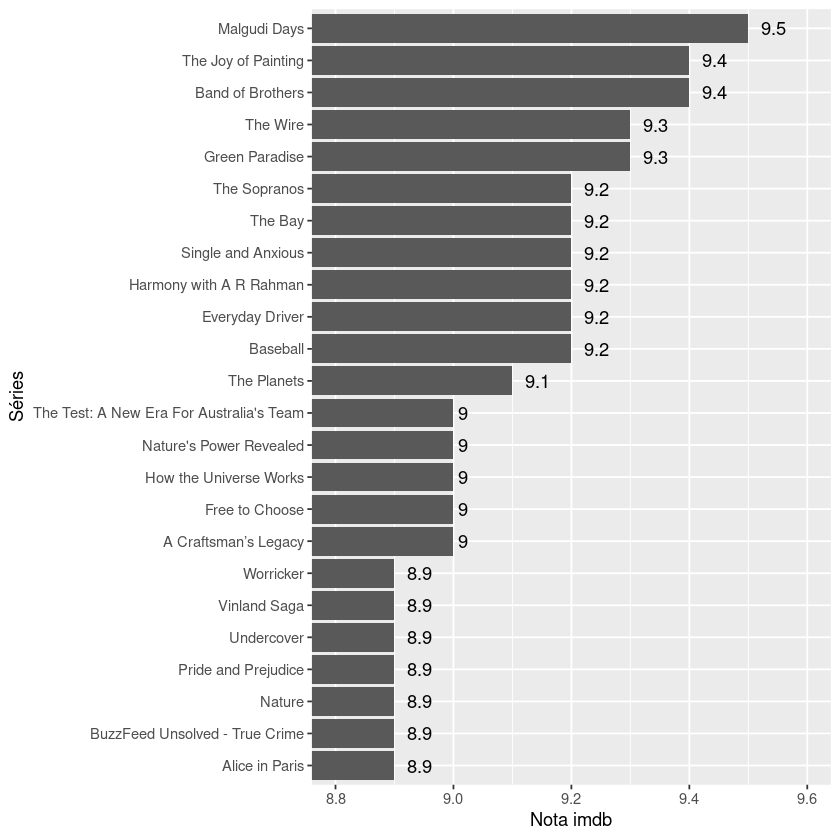

In [288]:
# Melhores séries disponíveis na Prime Vídeo pelo IMDb, notas > 8.8
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.8, str_detect(Streamings, "Prime"))) %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.8,9.6)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

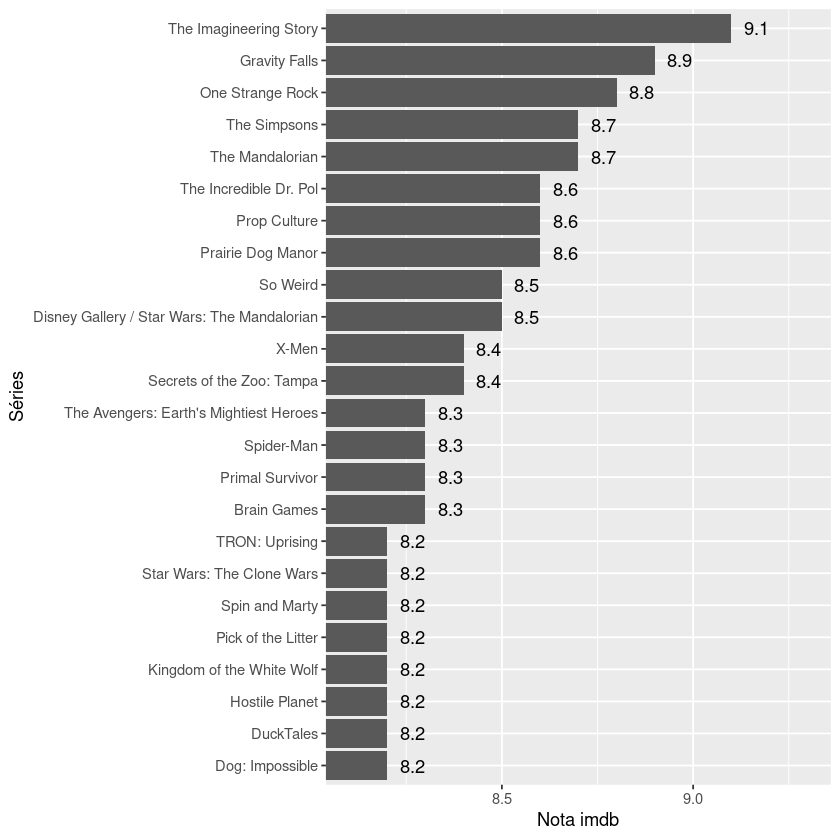

In [289]:
# Melhores séries disponíveis no Disney+ pelo IMDb, notas > 8.8                           
(cshows %>% arrange(-IMDb) %>% filter(IMDb>8.1, str_detect(Streamings, "Disney")))[c(T,T,T,F,T,T,T,T,T,T,T,T,T,F,T,F,T,T,T,F,T,F,T,T,T,F,T,T,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col() +
    coord_flip(ylim=c(8.1,9.3)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

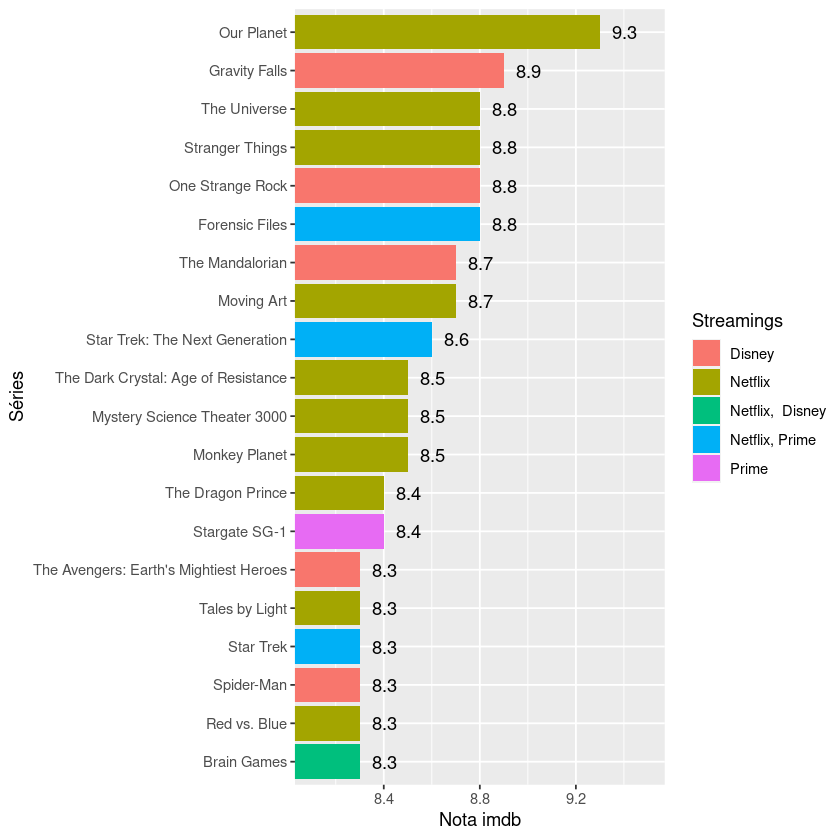

In [290]:
# Melhores séries de Ficção pelo IMDb (nota > 8.2)
(cshows %>% filter(str_detect(Genre,"Sci"), IMDb>8.2) %>% arrange(-IMDb))[c(T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,T,F,T,T),] %>%
    ggplot(aes(reorder(Title,IMDb),IMDb)) + geom_col(aes(fill=Streamings)) +
    coord_flip(ylim=c(8.1,9.5)) + xlab("Séries") + ylab("Nota imdb") +
    geom_text(aes(label = IMDb), hjust = -.5)

Warning message:
“Removed 938 rows containing non-finite values (stat_density).”
Warning message:
“Removed 938 rows containing non-finite values (stat_density).”


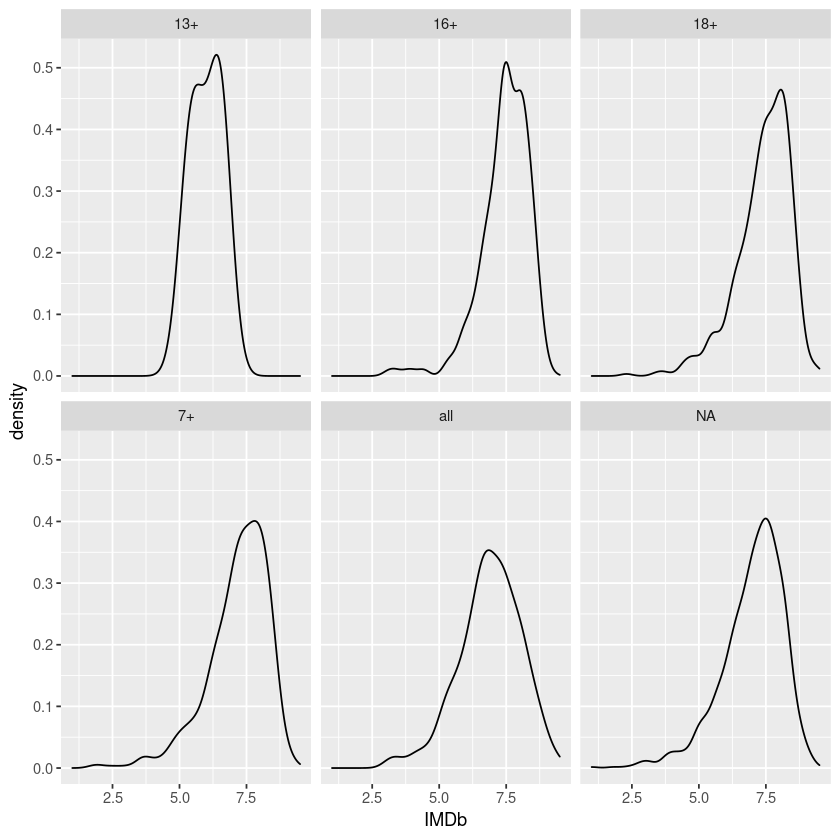

Warning message:
“Removed 3435 rows containing non-finite values (stat_density).”


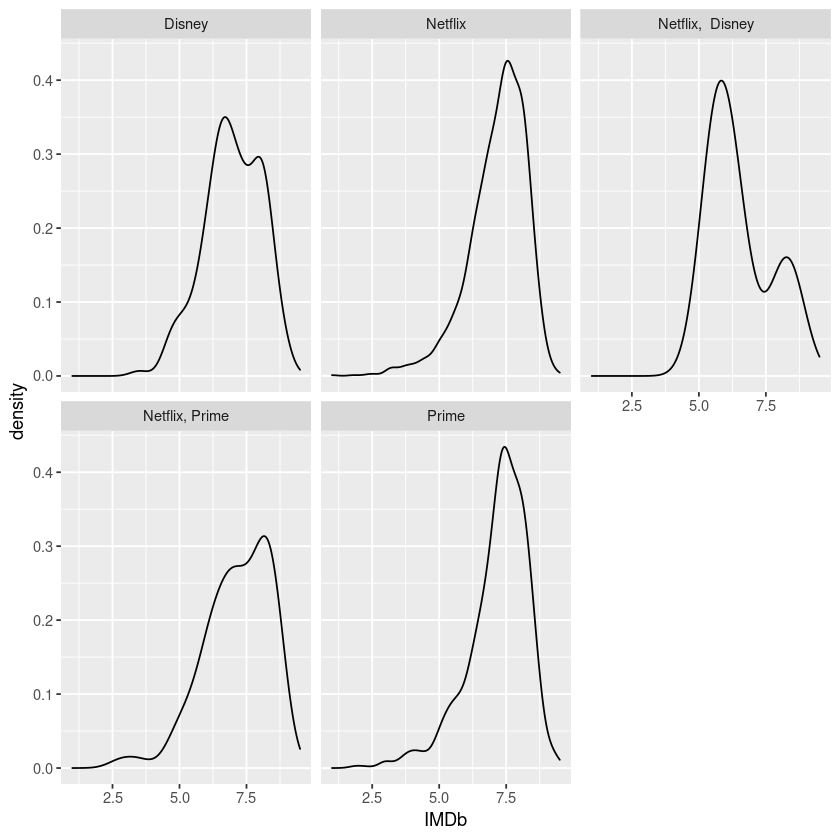

Warning message:
“Removed 3435 rows containing non-finite values (stat_density).”


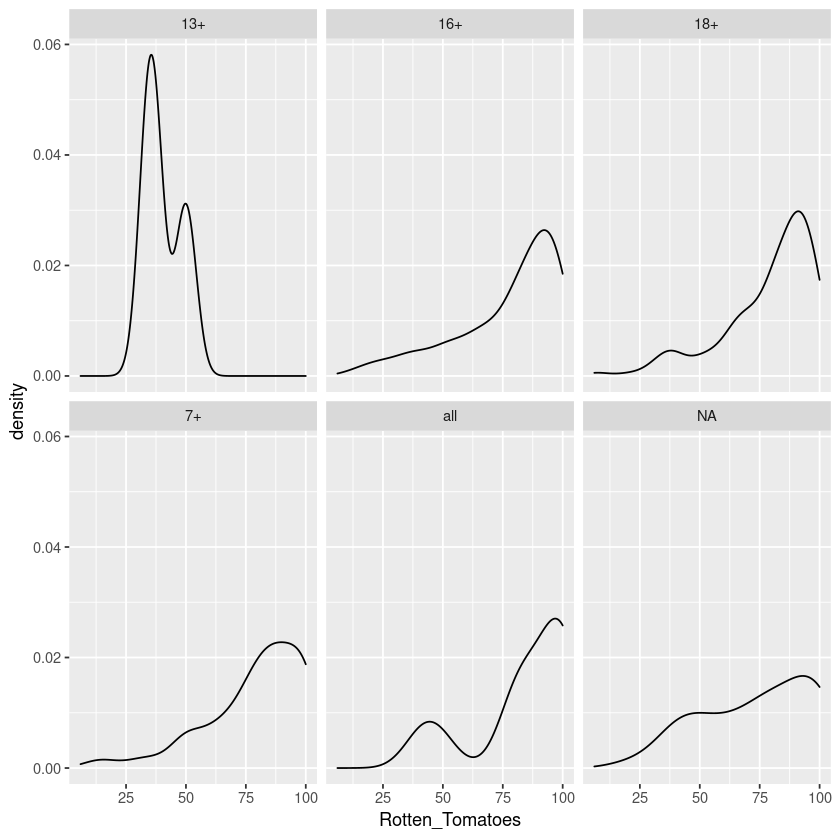

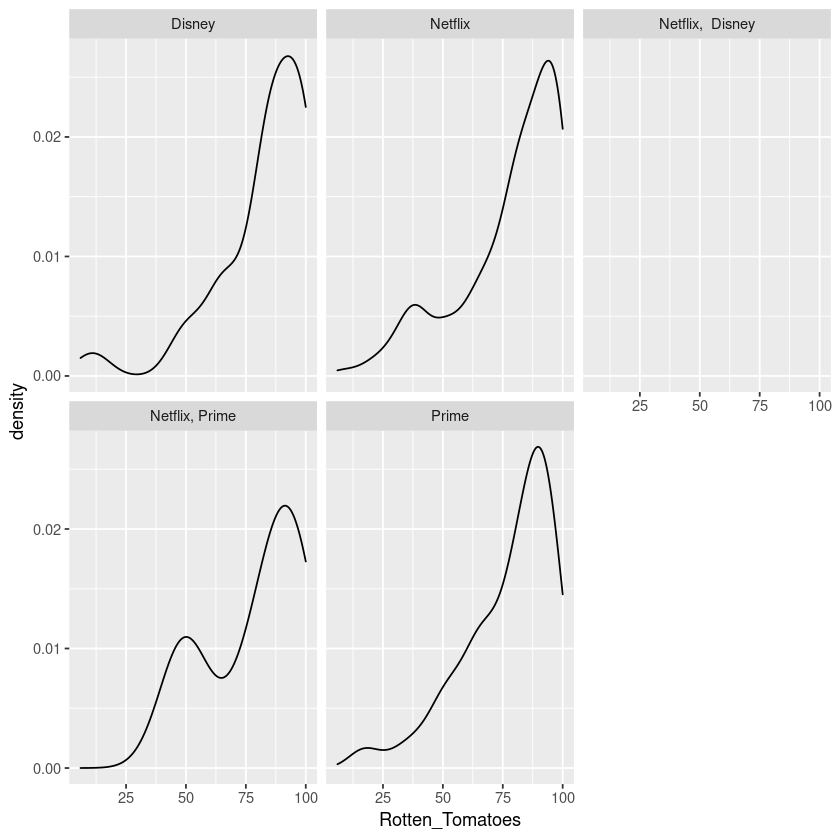

In [291]:
cshows %>% ggplot(aes(IMDb)) + geom_density() + facet_wrap(~Age)
cshows %>% ggplot(aes(IMDb)) + geom_density() + facet_wrap(~Streamings)
cshows %>% ggplot(aes(Rotten_Tomatoes)) + geom_density() + facet_wrap(~Age)
cshows %>% ggplot(aes(Rotten_Tomatoes)) + geom_density() + facet_wrap(~Streamings)